In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
initial_chamber_pressure = 2e6  # Pa
initial_throat_radius = 0.007702  # m

cstar = 1600  # m/s, characteristic velocity
mdot = 0.2329699  # kg/s, mass flow rate

throat_step = 0.0001  # m
final_throat_radius = 0.01  # m

number_of_steps = int((final_throat_radius - initial_throat_radius) / throat_step) + 1
print(f'Number of steps: {number_of_steps}')

Number of steps: 23


In [10]:
def compute_throat_area(mdot, cstar, chamber_pressure):
    """Compute the throat area of the nozzle."""
    return mdot * cstar / chamber_pressure

def compute_chamber_pressure(mdot, cstar, throat_area):
    """Compute the chamber pressure of the nozzle."""
    return mdot * cstar / throat_area

In [11]:
pressures = []
for throat_radius in np.arange(initial_throat_radius, final_throat_radius, throat_step):
    throat_area = np.pi * throat_radius**2
    chamber_pressure = compute_chamber_pressure(mdot, cstar, throat_area)
    pressures.append(chamber_pressure)

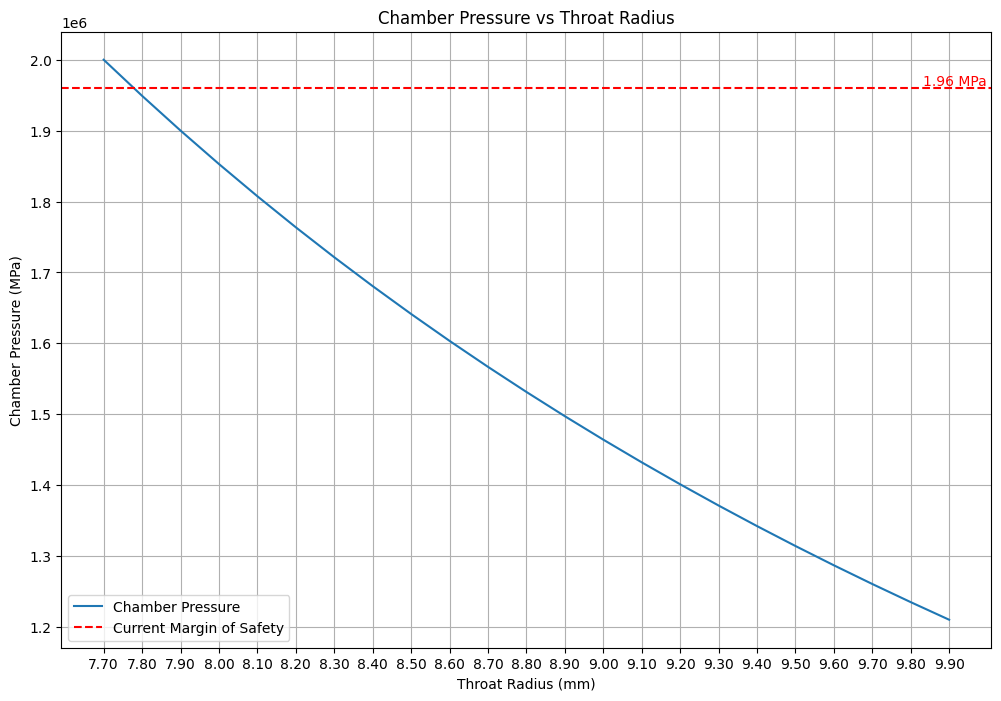

In [27]:
plt.gcf().set_size_inches(12, 8)

plt.title('Chamber Pressure vs Throat Radius')

plt.xlabel('Throat Radius (mm)')
plt.ylabel('Chamber Pressure (MPa)')
plt.plot(np.arange(initial_throat_radius, final_throat_radius, throat_step), pressures, label='Chamber Pressure')

plt.xticks(np.arange(initial_throat_radius, final_throat_radius, throat_step))
plt.xticks(np.arange(initial_throat_radius, final_throat_radius, throat_step), 
           [f"{x*1000:.2f}" for x in np.arange(initial_throat_radius, final_throat_radius, throat_step)])
plt.axhline(y=1.96e6, color='red', linestyle='--', label='Current Margin of Safety')
plt.text(final_throat_radius, 1.96e6, f'{1.96e6/1e6:.2f} MPa', color='red', va='bottom', ha='right')

plt.grid(which='both', axis='both')
plt.legend()
plt.show()